In [1]:
%matplotlib notebook
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random

from mpl_toolkits.mplot3d import Axes3D

# NEEDS TO POINT TO DATA IN YOUR ENVIRONMENT
DATA_PATH = '../matlab/TMS/Max_Power_top_corr.mat'

In [2]:
def get_data_from_mat():
    data = scipy.io.loadmat(DATA_PATH)
    x = data['maxpow_top']
    feat = data['features']
    top_feat = data['top_feats']
    return x

### KMeans and DBSCAN Clustering
Below both KMeans and DBSCAN are being run on the dataset. 

**Dataset Shapes:**
   * *maxpow_top: (18, 12)*
       * The maximum power corresponding to the top features row
   * *features: (1, 5)*
       * The top correlated features for frequency, channel, power type, reward type, tms type
   * *top_feats: (12, 5)*
       * The top 12 correlated feature groupings

**Hyperparameters:**
   * *number of clusters = 4*
   * *epsilon = .4*
   * *number of points = 2*

**Slices:**
   * Corresponds to which feature groupings to compare. Doing 3 at a time so it is easy to visualize on a graph but can also be expanded to go hyperdimensionally with KMeans and DBSCAN if need be

DBSCAN: [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1 -1  0  0]
KMeans: [0 0 0 0 3 0 3 3 3 0 2 0 0 0 2 1 3 3]


<IPython.core.display.Javascript object>


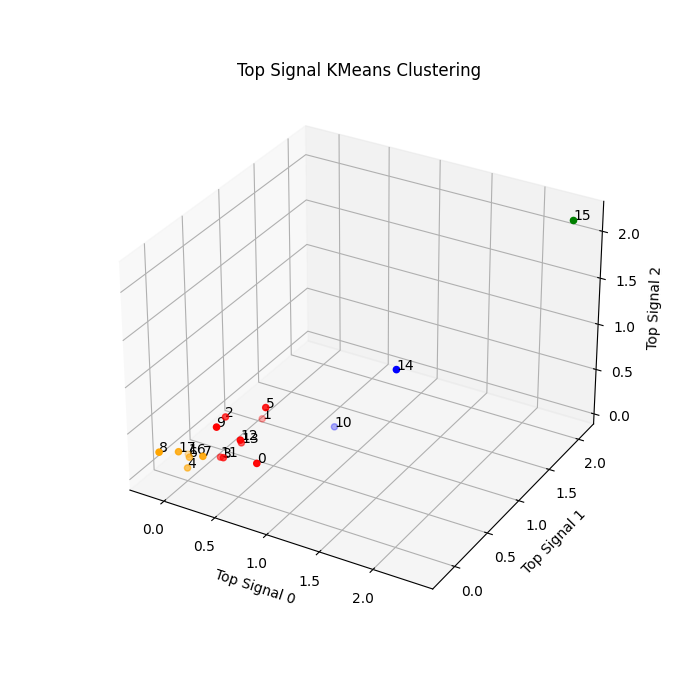

Text(0.5, 0.92, 'Top Signal KMeans Clustering')

In [3]:
k = 4
colors = ['red', 'green', 'blue', 'orange', 'purple']
e = .4
s = 2

# Comparing top 3 features
slice0 = 0
slice1 = 1
slice2 = 2
slice3 = 3
indices = slice(slice0,slice3)

# Labels for each Point
labels = [str(x) for x in range(18)]

dataset = get_data_from_mat()

# Models
kmeans = KMeans(n_clusters=k)
dbscan = DBSCAN(eps=e, min_samples=s)

# Fitting Model
d_results = dbscan.fit_predict(dataset[:,indices])
k_results = kmeans.fit_predict(dataset[:,indices])

print('DBSCAN: {}'.format(d_results))
print('KMeans: {}'.format(k_results))

# Plotting
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection='3d')
plotting = {}
for c in range(k):
    plotting.setdefault(c, []).append(dataset[np.where(k_results==c),indices])
for c in range(k):
    ax.scatter(plotting[c][0][0][:,0],
               plotting[c][0][0][:,1],
               plotting[c][0][0][:,2], 
               color=colors[c])
for i, label in enumerate(labels):
    ax.text(dataset[i,slice0], dataset[i,slice1], dataset[i,slice2], label)
ax.set_xlabel('Top Signal {}'.format(slice0))
ax.set_ylabel('Top Signal {}'.format(slice1))
ax.set_zlabel('Top Signal {}'.format(slice2))
ax.set_title('Top Signal KMeans Clustering')